# Revisão para a Prova: 

## Refazer a Lista 7 + Lista 11 (Somente para estudo, assim não precisa entregar novamente)

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from numpy import sqrt
from itertools import cycle
import matplotlib.pyplot as plt
plt.rcParams['legend.fontsize'] = 8

from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import preprocessing, metrics as m

from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# 1. Use K-Fold Cross Validation com k = 5 para resolver os seguintes problemas de machine learning: 

## Regressão

    Dataset: boston house-prices dataset
    
    Aplicar Standardization nas features.
    
    Comparar os resultados dos seguintes algoritmos: Gradient Descent, Linear Regression, kNN, Naive Bayes, SVM
    
    Usar as seguintes métricas: RMSE, MAE
    
    Escolher a melhor técnica e criar um modelo final usando todo o dataset para treinar o modelo.

In [2]:
X_boston, y_boston = load_boston(return_X_y=True)

train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X_boston, y_boston)

std_scale = preprocessing.StandardScaler().fit(X_boston)
X_boston_std = std_scale.transform(X_boston)

In [3]:
rmse_sgd = []
mae_sgd = []

rmse_lr = []
mae_lr = []

rmse_knnR = []
mae_knnR = []

rmse_svr = []
mae_svr = []

for train_index, test_index in train.split(X_boston, y_boston):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_boston[train_index], X_boston[test_index]
    y_train, y_test = y_boston[train_index], y_boston[test_index]
    
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    # Gradient Descent
    sgd = SGDRegressor(random_state=42).fit(X_train_std, y_train)
    y_pred_sgd = sgd.predict(X_test_std)
    rmse_sgd.append(sqrt(m.mean_squared_error(y_test, y_pred_sgd)))
    mae_sgd.append(m.mean_absolute_error(y_test, y_pred_sgd))

    # Linear Regression
    lr = LinearRegression().fit(X_train_std, y_train)
    y_pred_lr = lr.predict(X_test_std)
    rmse_lr.append(sqrt(m.mean_squared_error(y_test, y_pred_lr)))
    mae_lr.append(m.mean_absolute_error(y_test, y_pred_lr))

    #KNN Regressor
    knnR = KNeighborsRegressor().fit(X_train_std, y_train)
    y_pred_knnR = knnR.predict(X_test_std)
    rmse_knnR.append(sqrt(m.mean_squared_error(y_test, y_pred_knnR)))
    mae_knnR.append(m.mean_absolute_error(y_test, y_pred_knnR))

    #SVM
    svr = SVR(kernel='linear', C=1, gamma='auto').fit(X_train_std, y_train)
    y_pred_svr = svr.predict(X_test_std)
    rmse_svr.append(sqrt(m.mean_squared_error(y_test, y_pred_svr)))
    mae_svr.append(m.mean_absolute_error(y_test, y_pred_svr))    

In [4]:
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]
learning_rate = [ 0.1, 0.05, 0.01]

param_grid = {'n_estimators': n_estimators, 
              'max_depth': max_depth}

rfr = RandomForestRegressor(random_state=0)
gs = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                  scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
gs = gs.fit(X_boston_std, y_boston)
print("Parametros do rfr {}".format(gs.best_params_))

param_grid = {'n_estimators': n_estimators, 
              'max_depth': max_depth, 
              'learning_rate': learning_rate}

gbr = GradientBoostingRegressor(random_state=0)
gs = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                  scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
gs = gs.fit(X_boston_std, y_boston)
print("Parametros do gbr {}".format(gs.best_params_))

Parametros do rfr {'max_depth': 7, 'n_estimators': 100}
Parametros do gbr {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [5]:
rmse_dtr = []
mae_dtr = []

rmse_rfr = []
mae_rfr = []

rmse_gbr = []
mae_gbr = []

for train_index, test_index in train.split(X_boston, y_boston):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_boston[train_index], X_boston[test_index]
    y_train, y_test = y_boston[train_index], y_boston[test_index]
    
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    #DTR
    dtr = DecisionTreeRegressor(random_state=0).fit(X_train_std, y_train)
    y_pred_dtr = dtr.predict(X_test_std)
    rmse_dtr.append(sqrt(m.mean_squared_error(y_test, y_pred_dtr)))
    mae_dtr.append(m.mean_absolute_error(y_test, y_pred_dtr))
    
    #RFR
    rfr = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=7).fit(X_train_std, y_train)
    y_pred_rfr = rfr.predict(X_test_std)
    rmse_rfr.append(sqrt(m.mean_squared_error(y_test, y_pred_rfr)))
    mae_rfr.append(m.mean_absolute_error(y_test, y_pred_rfr))    
    
    #GBR
    gbr = GradientBoostingRegressor(random_state=0, learning_rate=0.05, 
                                    n_estimators=200, max_depth=3).fit(X_train_std, y_train)
    y_pred_gbr = gbr.predict(X_test_std)
    rmse_gbr.append(sqrt(m.mean_squared_error(y_test, y_pred_gbr)))
    mae_gbr.append(m.mean_absolute_error(y_test, y_pred_gbr))  

SGD: RMSE = 4.9163171017969685 and MAE = 3.2950866497667617
LiR: RMSE = 4.843271055765916 and MAE = 3.3907477744403764
KnnR: RMSE = 4.560714535240072 and MAE = 2.872253154727237
SVR: RMSE = 5.093940639009792 and MAE = 3.2510513362013045
DTR: RMSE = 4.646264878379325 and MAE = 3.0289768976897693
RFR: RMSE = 3.3197780575762983 and MAE = 2.2730748872017528
GBR: RMSE = 2.9287938872795634 and MAE = 2.0702437871108748


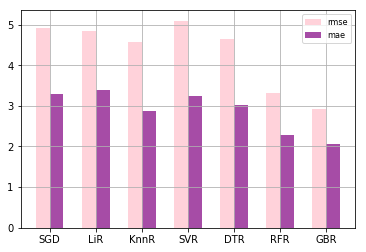

In [6]:
class_names = ['SGD','LiR','KnnR','SVR', 'DTR','RFR','GBR']
class_ = [np.mean(rmse_sgd), np.mean(rmse_lr), np.mean(rmse_knnR), 
          np.mean(rmse_svr), np.mean(rmse_dtr), np.mean(rmse_rfr), np.mean(rmse_gbr)]
class_1 = [np.mean(mae_sgd), np.mean(mae_lr), np.mean(mae_knnR), 
           np.mean(mae_svr), np.mean(mae_dtr), np.mean(mae_rfr), np.mean(mae_gbr)]

for i in range(0,len(class_names)):
    print("{}: RMSE = {} and MAE = {}".format(class_names[i], class_[i], class_1[i]))

grupos = len(class_names) #definir quantidade de barras
indice = np.arange(grupos) #não sei
bar_larg = 0.3 # largura da barra
transp = 0.7 #não sei

plt.grid() #plota a grade do fundo
plt.bar(indice, class_, bar_larg, alpha=transp, color='pink', label='rmse') 
#plotar uma barra correspondente ao rmse (indice indica onde que começa no gráfico, 
#passando o class_ ele cria uma barra dessa pra cada valor no array), bar_larg a largura da barra, 
#não sei o que é o alpha(tem na documentação), a cor e o label
plt.bar(indice + bar_larg, class_1, bar_larg, alpha=transp, color='purple', label='mae')
#mesma coisa de cima, sendo que cria a barra começando do indice + bar_larg pra ficar ao lado
plt.xticks(indice + bar_larg / 2, class_names) # altera a largura e quantidade desses traços verticais da grade
plt.legend() # plota a legenda

Feature ranking:
1. feature 5 (0.232363)
2. feature 12 (0.143724)
3. feature 7 (0.133069)
4. feature 6 (0.086427)
5. feature 0 (0.084711)
6. feature 9 (0.069298)
7. feature 11 (0.066305)
8. feature 4 (0.059855)
9. feature 10 (0.051818)
10. feature 2 (0.040015)
11. feature 8 (0.013287)
12. feature 1 (0.010880)
13. feature 3 (0.008248)


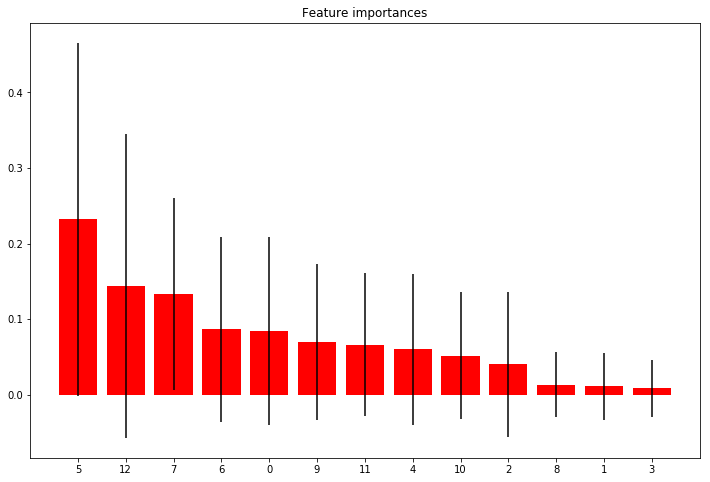

In [7]:
gbr_final = GradientBoostingRegressor(random_state=0, learning_rate=0.05, 
                                    n_estimators=200, max_depth=3).fit(X_boston, y_boston)

importances = gbr_final.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in gbr_final.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_boston.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X_boston.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_boston.shape[1]), indices)
plt.xlim([-1, X_boston.shape[1]])
plt.show()

## Classificação

    Dataset: breast cancer wisconsin dataset
    
    Aplicar Normalization nas features.
    
    Comparar os resultados dos seguintes algoritmos: Logistic Regression, kNN, Naive Bayes, SVM
    
    Mostrar a matriz de confusão
    
    Usar as seguintes métricas: Accuracy, Precision, Recall, F1-Measure, AOC
    
    Plotar curva ROC dos diferentes algoritmos.
    
    Escolher a melhor técnica e criar um modelo final usando todo o dataset para treinar o modelo.

In [8]:
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X_cancer, y_cancer)

norm_scale = preprocessing.MinMaxScaler().fit(X_cancer)
X_cancer_norm = norm_scale.transform(X_cancer)

In [9]:
acc_logR = []
pre_logR = []
rec_logR = []
f1_logR = []

acc_knnC = []
pre_knnC = []
rec_knnC = []
f1_knnC = []

acc_gnb = []
pre_gnb = []
rec_gnb = []
f1_gnb = []

acc_svc = []
pre_svc = []
rec_svc = []
f1_svc = []

for train_index, test_index in train.split(X_cancer, y_cancer):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train2, X_test2 = X_cancer[train_index], X_cancer[test_index]
    y_train2, y_test2 = y_cancer[train_index], y_cancer[test_index]
    
    norm_scale = preprocessing.MinMaxScaler().fit(X_train2)
    X_train2_norm = norm_scale.transform(X_train2)
    X_test2_norm = norm_scale.transform(X_test2)
    
    # Logistic Regression
    logR = LogisticRegression().fit(X_train2_norm, y_train2)
    y_pred_logR = logR.predict(X_test2_norm)
    acc_logR.append(m.accuracy_score(y_test2, y_pred_logR))
    pre_logR.append(m.precision_score(y_test2, y_pred_logR))
    rec_logR.append(m.recall_score(y_test2, y_pred_logR))
    f1_logR.append(m.f1_score(y_test2, y_pred_logR))

    #KNN Classifier
    knnC = KNeighborsClassifier().fit(X_train2_norm, y_train2)
    y_pred_knnC = knnC.predict(X_test2_norm)
    acc_knnC.append(m.accuracy_score(y_test2, y_pred_knnC))
    pre_knnC.append(m.precision_score(y_test2, y_pred_knnC))
    rec_knnC.append(m.recall_score(y_test2, y_pred_knnC))
    f1_knnC.append(m.f1_score(y_test2, y_pred_knnC))
    
    #Naive Bayes
    gnb = GaussianNB().fit(X_train2_norm, y_train2)
    y_pred_gnb = gnb.predict(X_test2_norm)
    acc_gnb.append(m.accuracy_score(y_test2, y_pred_gnb))
    pre_gnb.append(m.precision_score(y_test2, y_pred_gnb))
    rec_gnb.append(m.recall_score(y_test2, y_pred_gnb))
    f1_gnb.append(m.f1_score(y_test2, y_pred_gnb))
    
    #SVM
    svc = SVC(kernel='linear', C=1, gamma='auto').fit(X_train2_norm, y_train2)
    y_pred_svc = svc.predict(X_test2_norm)
    acc_svc.append(m.accuracy_score(y_test2, y_pred_svc))
    pre_svc.append(m.precision_score(y_test2, y_pred_svc))
    rec_svc.append(m.recall_score(y_test2, y_pred_svc))
    f1_svc.append(m.f1_score(y_test2, y_pred_svc))

In [10]:
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]
learning_rate = [ 0.1, 0.05, 0.01]

param_grid = {'n_estimators': n_estimators, 
              'max_depth': max_depth}

rfc = RandomForestClassifier(random_state=0)
gs = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                  scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
gs = gs.fit(X_boston_std, y_boston)
print("Parametros do rfc {}".format(gs.best_params_))

param_grid = {'n_estimators': n_estimators, 
              'max_depth': max_depth, 
              'learning_rate': learning_rate}

gbc = GradientBoostingClassifier(random_state=0)
gs = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                  scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
gs = gs.fit(X_boston_std, y_boston)
print("Parametros do gbc {}".format(gs.best_params_))

Parametros do rfc {'max_depth': 7, 'n_estimators': 100}
Parametros do gbc {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [11]:
acc_dtc = []
pre_dtc = []
rec_dtc = []
f1_dtc = []

acc_rfc = []
pre_rfc = []
rec_rfc = []
f1_rfc = []

acc_gbc = []
pre_gbc = []
rec_gbc = []
f1_gbc = []

for train_index, test_index in train.split(X_cancer, y_cancer):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train2, X_test2 = X_cancer[train_index], X_cancer[test_index]
    y_train2, y_test2 = y_cancer[train_index], y_cancer[test_index]
    
    norm_scale = preprocessing.MinMaxScaler().fit(X_train2)
    X_train2_norm = norm_scale.transform(X_train2)
    X_test2_norm = norm_scale.transform(X_test2)
    
    #DTC
    dtc = DecisionTreeClassifier(random_state=0).fit(X_train2_norm, y_train2)
    y_pred_dtc = dtc.predict(X_test2_norm)
    acc_dtc.append(m.accuracy_score(y_test2, y_pred_dtc))
    pre_dtc.append(m.precision_score(y_test2, y_pred_dtc))
    rec_dtc.append(m.recall_score(y_test2, y_pred_dtc))
    f1_dtc.append(m.f1_score(y_test2, y_pred_dtc))
    
    #RFC
    rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=7).fit(X_train2_norm, y_train2)
    y_pred_rfc = rfc.predict(X_test2_norm)
    acc_rfc.append(m.accuracy_score(y_test2, y_pred_rfc))
    pre_rfc.append(m.precision_score(y_test2, y_pred_rfc))
    rec_rfc.append(m.recall_score(y_test2, y_pred_rfc))
    f1_rfc.append(m.f1_score(y_test2, y_pred_rfc))  
    
    #GBC
    gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.05, 
                                    n_estimators=200, max_depth=3).fit(X_train2_norm, y_train2)
    y_pred_gbc = gbc.predict(X_test2_norm)
    acc_gbc.append(m.accuracy_score(y_test2, y_pred_gbc))
    pre_gbc.append(m.precision_score(y_test2, y_pred_gbc))
    rec_gbc.append(m.recall_score(y_test2, y_pred_gbc))
    f1_gbc.append(m.f1_score(y_test2, y_pred_gbc))

LogR: 
 ACC = 0.95954044403043 
 PRE = 0.9439005587866347 
 REC = 0.9945856959941466 
 F1 = 0.9684287820441952 

KnnC: 
 ACC = 0.964803601925167 
 PRE = 0.9589076617245633 
 REC = 0.9859668185503796 
 F1 = 0.972089551764833 

GNB: 
 ACC = 0.9367179009470579 
 PRE = 0.9420830389692154 
 REC = 0.95850762649165 
 F1 = 0.9500453465382451 

SVC: 
 ACC = 0.9789007918025151 
 PRE = 0.9697641566134717 
 REC = 0.9974025974025974 
 F1 = 0.9833295487687636 

DTC: 
 ACC = 0.9332557056357708 
 PRE = 0.9443378046054102 
 REC = 0.9506127675141759 
 F1 = 0.9471835713770513 

RFC: 
 ACC = 0.9613414066138798 
 PRE = 0.9612599679186934 
 REC = 0.9775161143250275 
 F1 = 0.969217317910512 

GBC: 
 ACC = 0.9630957925787922 
 PRE = 0.9641856015934167 
 REC = 0.9775161143250275 
 F1 = 0.9707481087956683 



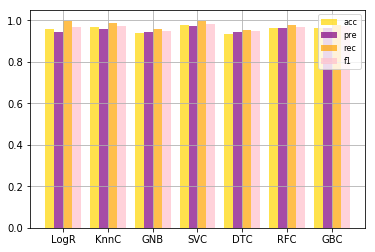

In [12]:
class_names2 = ['LogR','KnnC','GNB','SVC', 'DTC', 'RFC', 'GBC']
class2_ = [np.mean(acc_logR), np.mean(acc_knnC), np.mean(acc_gnb), 
           np.mean(acc_svc), np.mean(acc_dtc), np.mean(acc_rfc), np.mean(acc_gbc)]
class2_1 = [np.mean(pre_logR), np.mean(pre_knnC), np.mean(pre_gnb), 
            np.mean(pre_svc), np.mean(pre_dtc), np.mean(pre_rfc), np.mean(pre_gbc)]
class2_2 = [np.mean(rec_logR), np.mean(rec_knnC), np.mean(rec_gnb), 
            np.mean(rec_svc), np.mean(rec_dtc), np.mean(rec_rfc), np.mean(rec_gbc)]
class2_3 = [np.mean(f1_logR), np.mean(f1_knnC), np.mean(f1_gnb), 
            np.mean(f1_svc), np.mean(f1_dtc), np.mean(f1_rfc), np.mean(f1_gbc)]
for i in range(len(class_names2)):
    print("{}: \n ACC = {} \n PRE = {} \n REC = {} \n F1 = {} \n".format(class_names2[i], 
                                                                         class2_[i], 
                                                                         class2_1[i], 
                                                                         class2_2[i], 
                                                                         class2_3[i]))

grupos = len(class_names2)
indice = np.arange(grupos)
bar_larg = 0.2
transp = 0.7

plt.grid()
plt.bar(indice, class2_, bar_larg, alpha=transp, color='gold', label='acc')
indice = indice + bar_larg
plt.bar(indice, class2_1, bar_larg, alpha=transp, color='purple', label='pre')
indice = indice + bar_larg
plt.bar(indice, class2_2, bar_larg, alpha=transp, color='orange', label='rec')
indice = indice + bar_larg
plt.bar(indice, class2_3, bar_larg, alpha=transp, color='pink', label='f1')

plt.xticks(indice - bar_larg * 3/2, class_names2)
plt.legend()

Feature ranking:
1. feature 23 (0.110547)
2. feature 7 (0.108991)
3. feature 22 (0.081866)
4. feature 27 (0.081093)
5. feature 20 (0.066462)
6. feature 21 (0.066226)
7. feature 13 (0.043333)
8. feature 19 (0.035850)
9. feature 1 (0.035668)
10. feature 24 (0.035234)
11. feature 3 (0.035117)
12. feature 15 (0.033620)
13. feature 5 (0.033237)


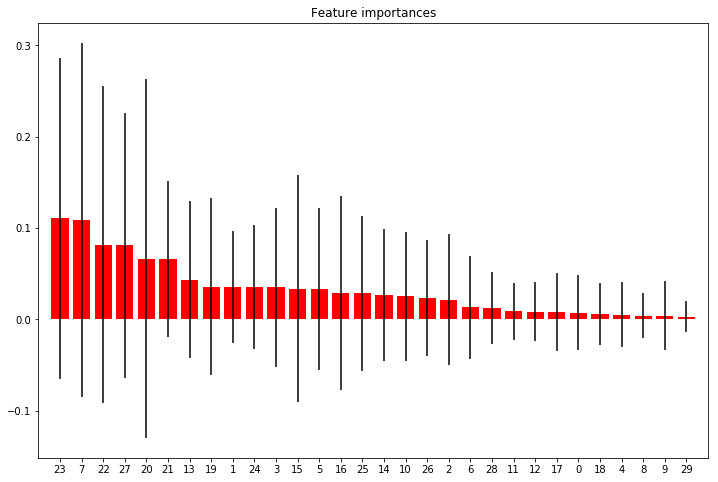

In [13]:
gbc_final = GradientBoostingClassifier(random_state=0, learning_rate=0.05, 
                                    n_estimators=200, max_depth=3).fit(X_cancer, y_cancer)

importances = gbc_final.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in gbc_final.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_boston.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X_cancer.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_cancer.shape[1]), indices)
plt.xlim([-1, X_cancer.shape[1]])
plt.show()

Preencha seus resultados de RMSE (para o problema de regressão) e Accuracy (para o problema de classificação) na seguinte planilha online (https://docs.google.com/spreadsheets/d/1Zkm8q3uvkL-vCpiG2M-_s-K3j_3XK8zFLDZrtTqPImk/edit#gid=0).